In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from src.load_data import loader
sns.set_theme(style="whitegrid")

In [3]:
# Demographics
demo = pd.read_csv('data/demographics.csv')

In [4]:
print(demo.columns)

Index(['adult', 'student', 'zipcode', 'age', 'prior_experience', 'group'], dtype='object')


In [5]:
# Detailed Demographics
ddmo = pd.read_csv('data/detailed_demographics.csv')

In [6]:
ddmo.columns

Index(['Gender', 'Gender_Text', 'Degree', 'Law_Ex', 'Race', 'P_Language',
       'P_Lan_Text', 'S_Language', 'S_Lan_Text', 'Work', 'Income'],
      dtype='object')

In [7]:
ddmo['Gender'].unique()

array(['Female', 'Male', 'Non-binary / third gender', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

In [8]:
groups = pd.read_csv('data/group.csv')
ddmo_with_groups = pd.merge(ddmo, groups, left_index=True, right_index=True)

In [9]:
print(ddmo_with_groups.columns)

Index(['Gender', 'Gender_Text', 'Degree', 'Law_Ex', 'Race', 'P_Language',
       'P_Lan_Text', 'S_Language', 'S_Lan_Text', 'Work', 'Income', 'group',
       'EmpathyBot', 'AngerInducement'],
      dtype='object')


In [10]:
# Gender counts across all participants
gender_counts = ddmo['Gender'].value_counts()
gender_percentages = ddmo['Gender'].value_counts(normalize=True) * 100

print("Gender counts:")
print(gender_counts)
print("\nGender percentages:")
print(gender_percentages.round(2).astype(str) + '%')

# Gender counts per group
gender_counts_by_group = ddmo_with_groups.groupby('group')['Gender'].value_counts().unstack(fill_value=0)

# Convert to integer type
gender_counts = gender_counts.astype(int)
gender_counts_by_group = gender_counts_by_group.astype(int)
print("Counts across groups:")
print(gender_counts_by_group)

Gender counts:
Female                       159
Male                         101
Non-binary / third gender     13
Prefer not to say              3
Prefer to self-describe        1
Name: Gender, dtype: int64

Gender percentages:
Female                        57.4%
Male                         36.46%
Non-binary / third gender     4.69%
Prefer not to say             1.08%
Prefer to self-describe       0.36%
Name: Gender, dtype: object
Counts across groups:
Gender  Female  Male  Non-binary / third gender  Prefer not to say  \
group                                                                
A           28    18                          1                  0   
B           32    13                          2                  0   
C           26    17                          3                  0   
D           23    18                          2                  2   
E           24    17                          4                  0   
F           26    18                          1     

In [11]:
# Age counts across all groups
age_counts = demo['age'].value_counts()
age_percentages = demo['age'].value_counts(normalize=True) * 100

print("Age Counts:")
print(age_counts)
print("\nAge percentages:")
print(age_percentages.round(2).astype(str) + '%')

age_counts_by_group = demo.groupby('group')['age'].value_counts().unstack(fill_value=0)
age_counts = age_counts.astype(int)
age_counts_by_group = age_counts_by_group.astype(int)
print("Age counts across groups:")
print(age_counts_by_group)

Age Counts:
25-34 years old    94
35-44 years old    74
45-54 years old    40
55-64 years old    25
18-24 years old    24
65+ years old      20
Name: age, dtype: int64

Age percentages:
25-34 years old    33.94%
35-44 years old    26.71%
45-54 years old    14.44%
55-64 years old     9.03%
18-24 years old     8.66%
65+ years old       7.22%
Name: age, dtype: object
Age counts across groups:
age    18-24 years old  25-34 years old  35-44 years old  45-54 years old  \
group                                                                       
A                    5               16               16                6   
B                    3               22               11                7   
C                    4               12               12                7   
D                    3               13               11                7   
E                    4               16               10                7   
F                    5               15               14            

In [12]:
# Degree counts across all groups
degree_counts = ddmo_with_groups['Degree'].value_counts()
degree_percentages = ddmo_with_groups['Degree'].value_counts(normalize=True) * 100

print("Degree Counts:")
print(degree_counts)
print("\nDegree percentages:")
print(degree_percentages.round(2).astype(str) + '%')

degree_counts_by_group = ddmo_with_groups.groupby('group')['Degree'].value_counts().unstack(fill_value=0)
degree_counts = degree_counts.astype(int)
degree_counts_by_group = degree_counts_by_group.astype(int)
print("Degree counts across groups:")
print(degree_counts_by_group)

Degree Counts:
Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)    138
Bachelor’s degree                                                       114
Some college, but no degree                                              17
Associates or technical degree                                            6
Prefer not to say                                                         1
High school diploma or GED                                                1
Name: Degree, dtype: int64

Degree percentages:
Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS etc.)    49.82%
Bachelor’s degree                                                       41.16%
Some college, but no degree                                              6.14%
Associates or technical degree                                           2.17%
Prefer not to say                                                        0.36%
High school diploma or GED                                               0.36%
Name: D

In [13]:
# Race counts across all groups
race_counts = ddmo_with_groups['Race'].value_counts()
race_percentages = ddmo_with_groups['Race'].value_counts(normalize=True) * 100

print("Race Counts:")
print(race_counts)
print("\nRace percentages:")
print(race_percentages.round(2).astype(str) + '%')

race_counts_by_group = ddmo_with_groups.groupby('group')['Race'].value_counts().unstack(fill_value=0)
race_counts = race_counts.astype(int)
race_counts_by_group = race_counts_by_group.astype(int)
print("Race counts across groups:")
print(race_counts_by_group)

# Combine all the other groups other than "White or Caucasian", "American Indian/Native American or Alaska Native", and "Black or African American"
# and calculate the group counts
main_groups = ["White or Caucasian", "American Indian/Native American or Alaska Native", "Black or African American"]
ddmo_with_groups['Race_Combined'] = ddmo_with_groups['Race'].apply(lambda x: x if x in main_groups else "Other")

race_combined_counts = ddmo_with_groups['Race_Combined'].value_counts()
race_combined_percentages = ddmo_with_groups['Race_Combined'].value_counts(normalize=True) * 100

print("Combined Race Counts:")
print(race_combined_counts)
print("\nCombined Race percentages:")
print(race_combined_percentages.round(2).astype(str) + '%')

race_combined_counts_by_group = ddmo_with_groups.groupby('group')['Race_Combined'].value_counts().unstack(fill_value=0)
race_combined_counts_by_group = race_combined_counts_by_group.astype(int)
print("Combined Race counts across groups:")
print(race_combined_counts_by_group)

Race Counts:
White or Caucasian                                                     198
American Indian/Native American or Alaska Native                        22
Black or African American                                               22
Other                                                                    9
Prefer not to say                                                        8
White or Caucasian,Prefer not to say                                     7
White or Caucasian,Latino/Hispanic                                       4
White or Caucasian,American Indian/Native American or Alaska Native      2
Native Hawaiian or Other Pacific Islander                                2
Black or African American,Latino/Hispanic                                1
Asian                                                                    1
White or Caucasian,Latino/Hispanic,Prefer not to say                     1
Name: Race, dtype: int64

Race percentages:
White or Caucasian                         

In [14]:
# Income counts across all groups
income_counts = ddmo_with_groups['Income'].value_counts()
income_percentages = ddmo_with_groups['Income'].value_counts(normalize=True) * 100

print("Income Counts:")
print(income_counts)
print("\nIncome percentages:")
print(income_percentages.round(2).astype(str) + '%')

income_counts_by_group = ddmo_with_groups.groupby('group')['Income'].value_counts().unstack(fill_value=0)
income_counts = income_counts.astype(int)
income_counts_by_group = income_counts_by_group.astype(int)
print("Income counts across groups:")
print(income_counts_by_group)

Income Counts:
$150,000 or more     60
$100,000-$149,999    60
$50,000-$74,999      57
$25,000-$49,999      41
$75,000-$99,999      33
Prefer not to say    15
Less than $25,000    11
Name: Income, dtype: int64

Income percentages:
$150,000 or more     21.66%
$100,000-$149,999    21.66%
$50,000-$74,999      20.58%
$25,000-$49,999       14.8%
$75,000-$99,999      11.91%
Prefer not to say     5.42%
Less than $25,000     3.97%
Name: Income, dtype: object
Income counts across groups:
Income  $100,000-$149,999  $150,000 or more  $25,000-$49,999  $50,000-$74,999  \
group                                                                           
A                      10                 7                9               12   
B                       9                11                4               10   
C                       8                15                5                8   
D                       9                11                6               10   
E                      11     

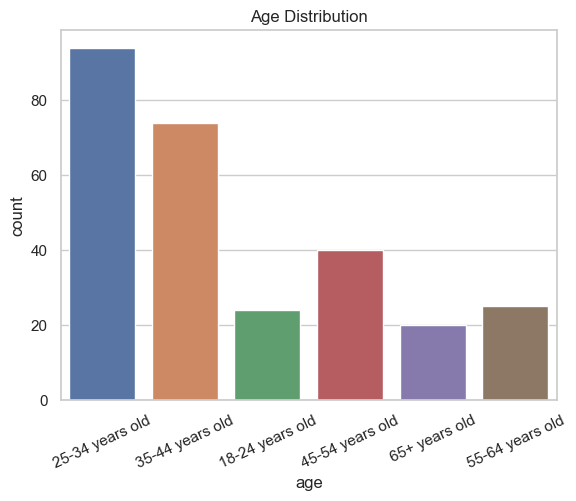

In [15]:
## Age
ax = sns.countplot(x='age',data=demo)
ax.set(title='Age Distribution')
ax.tick_params(axis = 'x',rotation = 25)
plt.show()

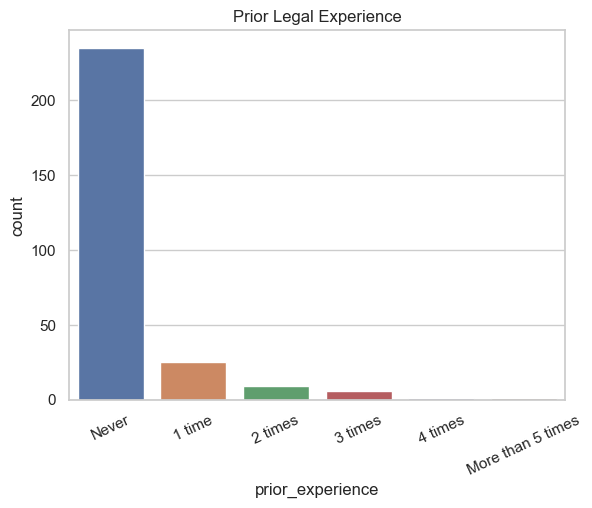

In [16]:
## Prior Experience
ax = sns.countplot(x='prior_experience',data=demo)
ax.set(title='Prior Legal Experience')
ax.tick_params(axis = 'x',rotation = 25)
plt.show()

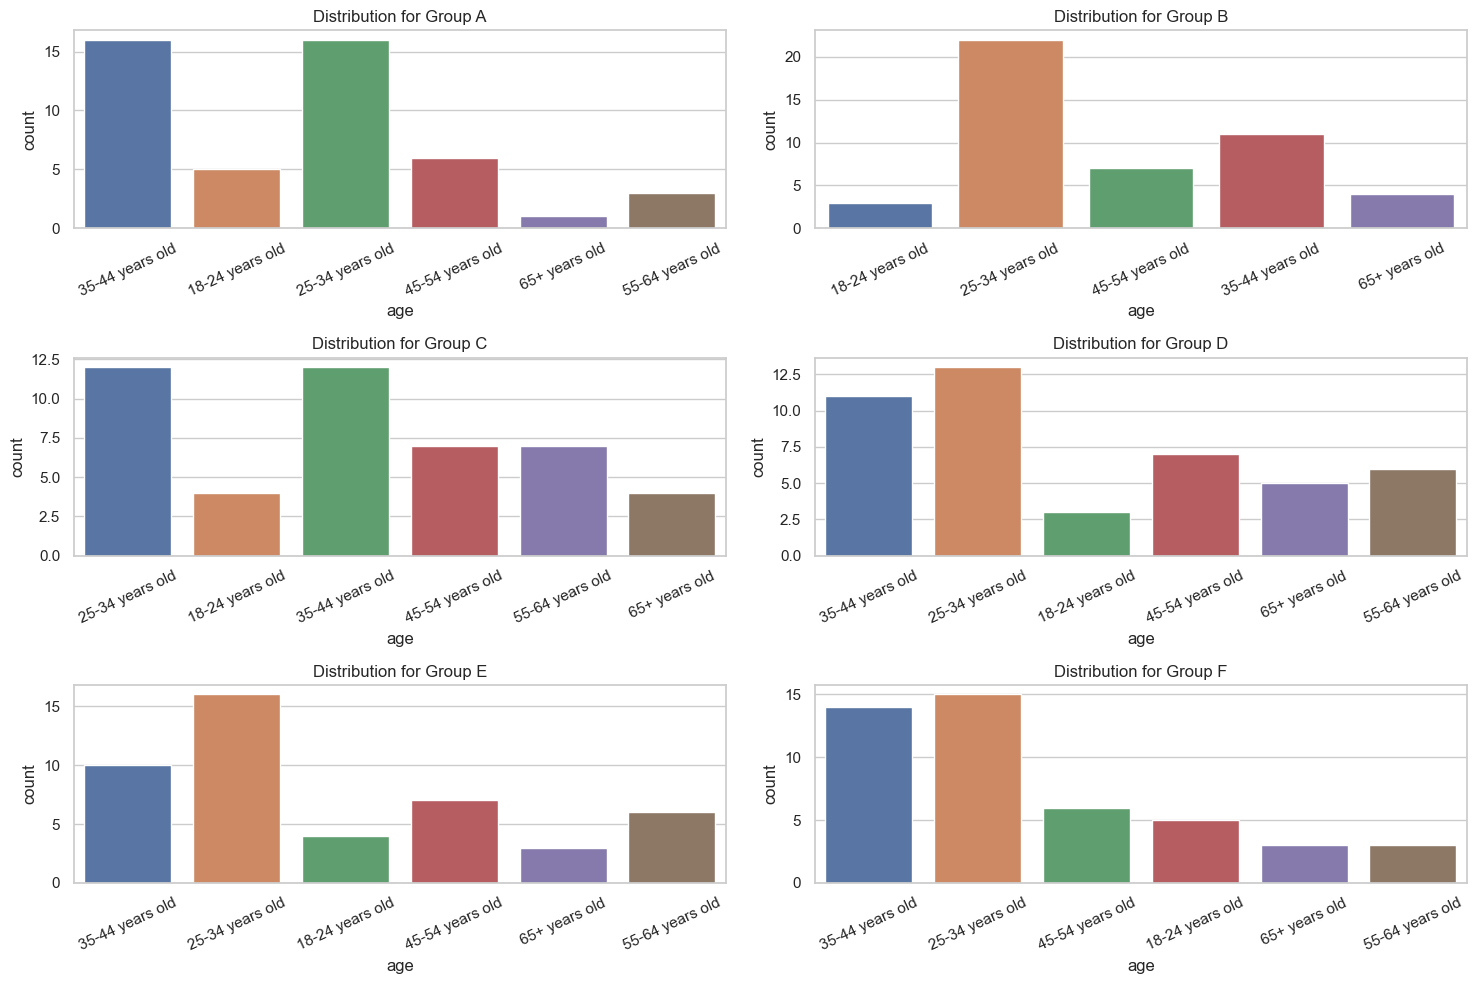

In [17]:
## Per Group Analysis
groups = pd.read_csv('data/group.csv')
## Distribution Across All Groups
unique_groups = ['A','B','C','D','E','F']
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
for i, group in enumerate(unique_groups):
    sns.countplot(x='age', data=demo[demo['group'] == group], ax=axes[i])
    axes[i].set(title=f'Distribution for Group {group}')
    axes[i].tick_params(axis='x', rotation=25)
plt.tight_layout()
plt.show()

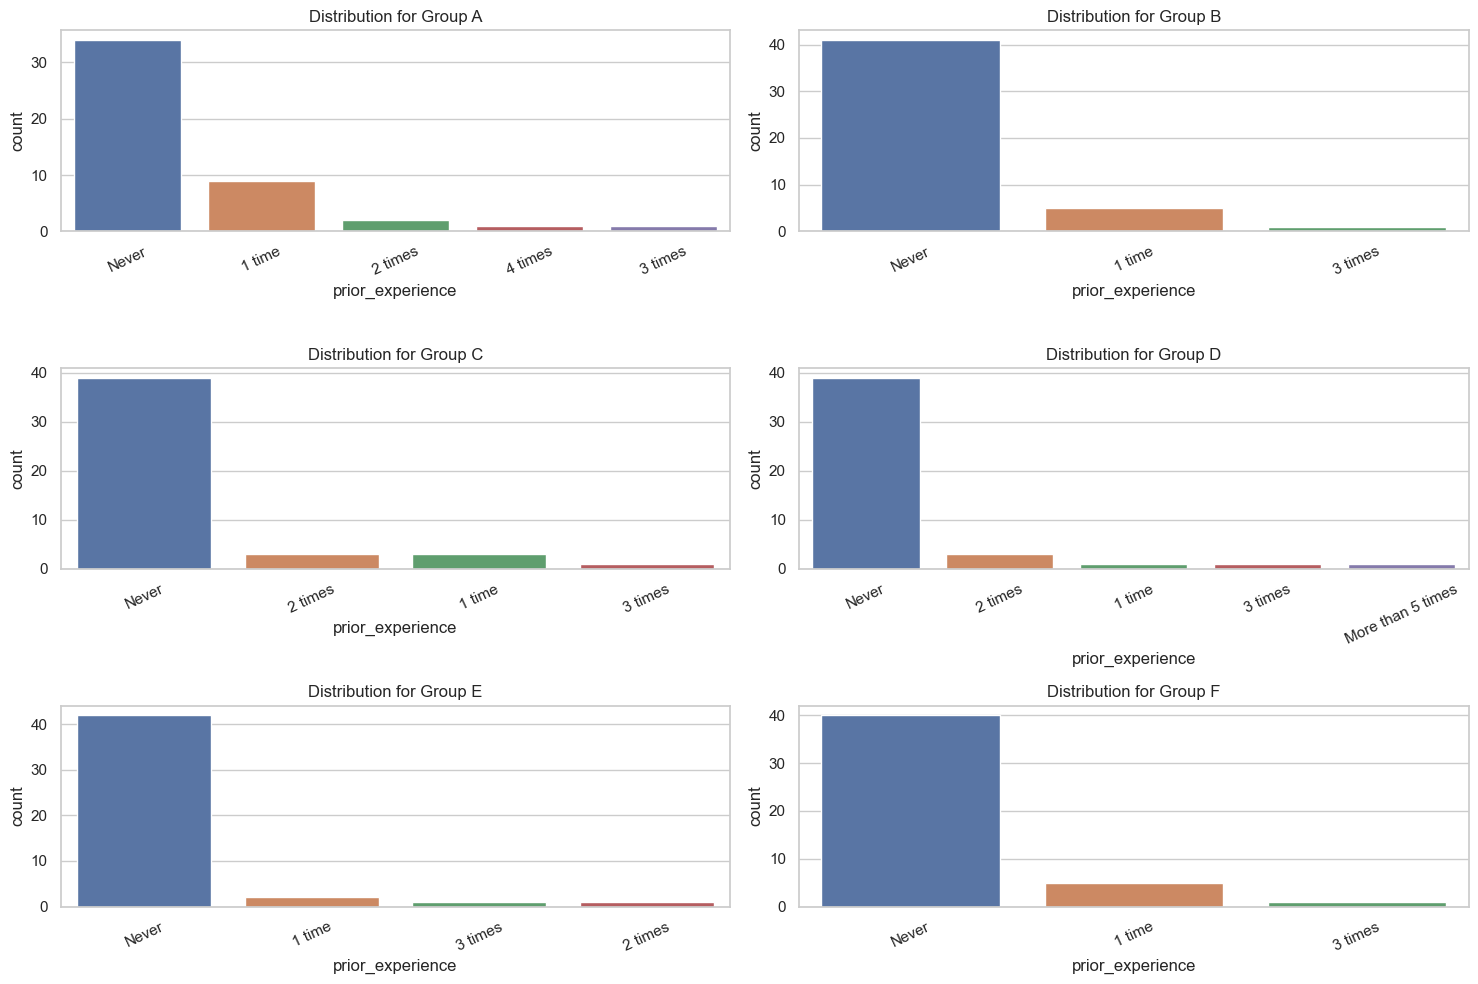

In [18]:
## Per Group Analysis
groups = pd.read_csv('data/group.csv')
## Distribution Across All Groups
unique_groups = ['A','B','C','D','E','F']
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
for i, group in enumerate(unique_groups):
    sns.countplot(x='prior_experience', data=demo[demo['group'] == group], ax=axes[i])
    axes[i].set(title=f'Distribution for Group {group}')
    axes[i].tick_params(axis='x', rotation=25)
plt.tight_layout()
plt.show()

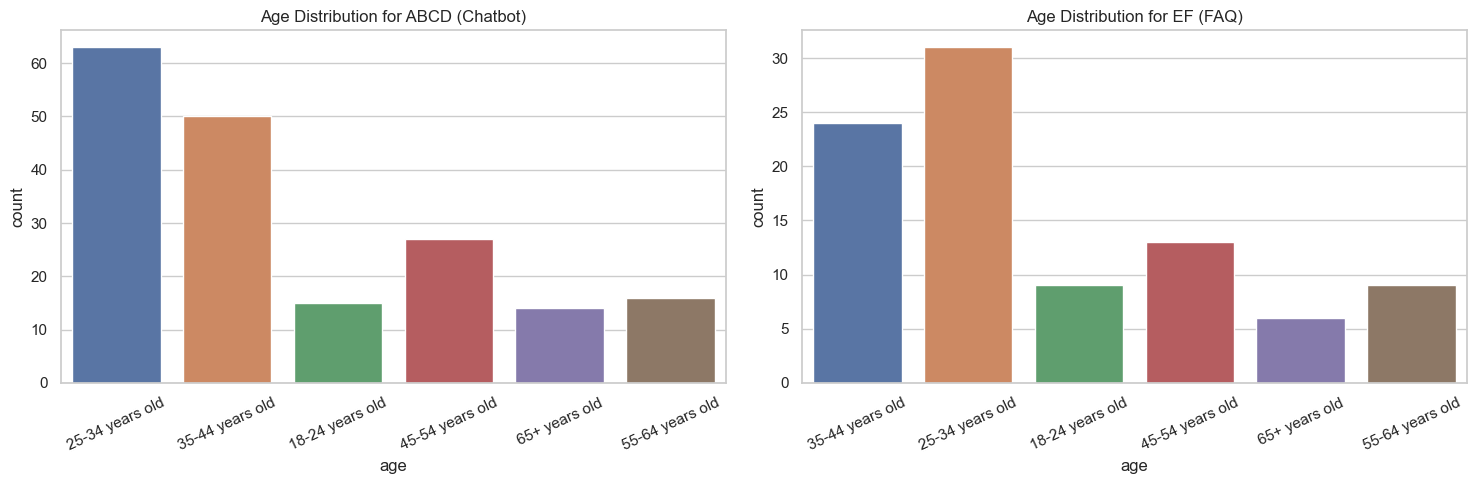

In [19]:
## ABCD vs EF Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ABCD (chatbot)
abcs = demo[demo['group'].isin(['A', 'B', 'C', 'D'])]
sns.countplot(x='age', data=abcs, ax=axes[0])
axes[0].set(title='Age Distribution for ABCD (Chatbot)')
axes[0].tick_params(axis='x', rotation=25)

# EF (FAQ)
efs = demo[demo['group'].isin(['E', 'F'])]
sns.countplot(x='age', data=efs, ax=axes[1])
axes[1].set(title='Age Distribution for EF (FAQ)')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


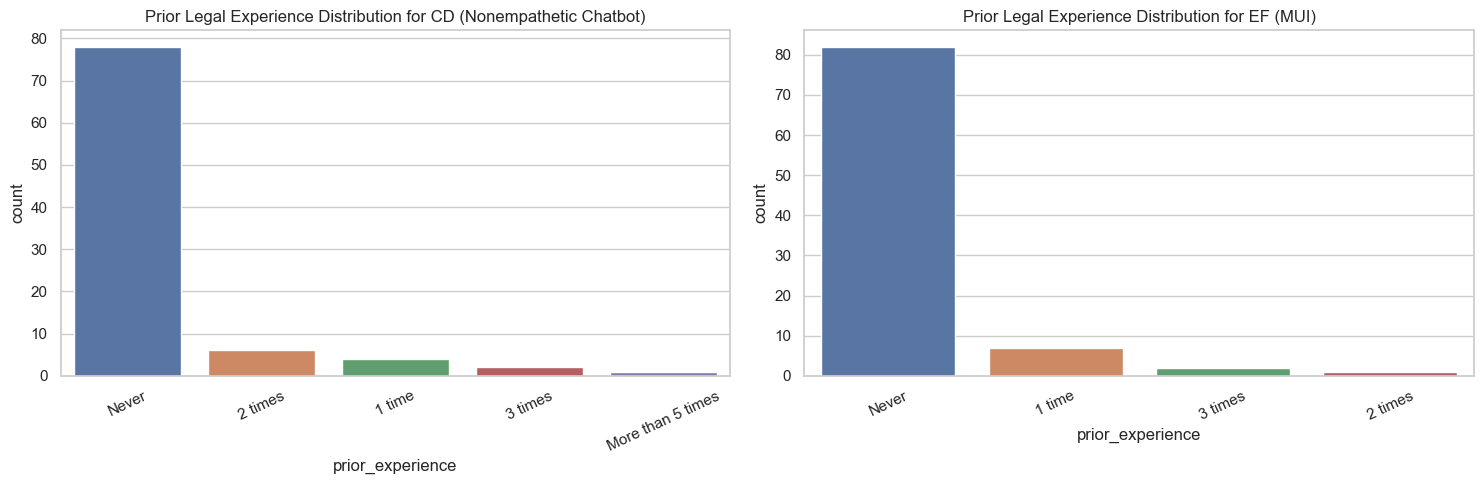

In [20]:
## ABCD vs EF Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ABCD (chatbot)
abcs = demo[demo['group'].isin(['C', 'D'])]
sns.countplot(x='prior_experience', data=abcs, ax=axes[0])
axes[0].set(title='Prior Legal Experience Distribution for CD (Nonempathetic Chatbot)')
axes[0].tick_params(axis='x', rotation=25)

# EF (FAQ)
efs = demo[demo['group'].isin(['E', 'F'])]
sns.countplot(x='prior_experience', data=efs, ax=axes[1])
axes[1].set(title='Prior Legal Experience Distribution for EF (MUI)')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

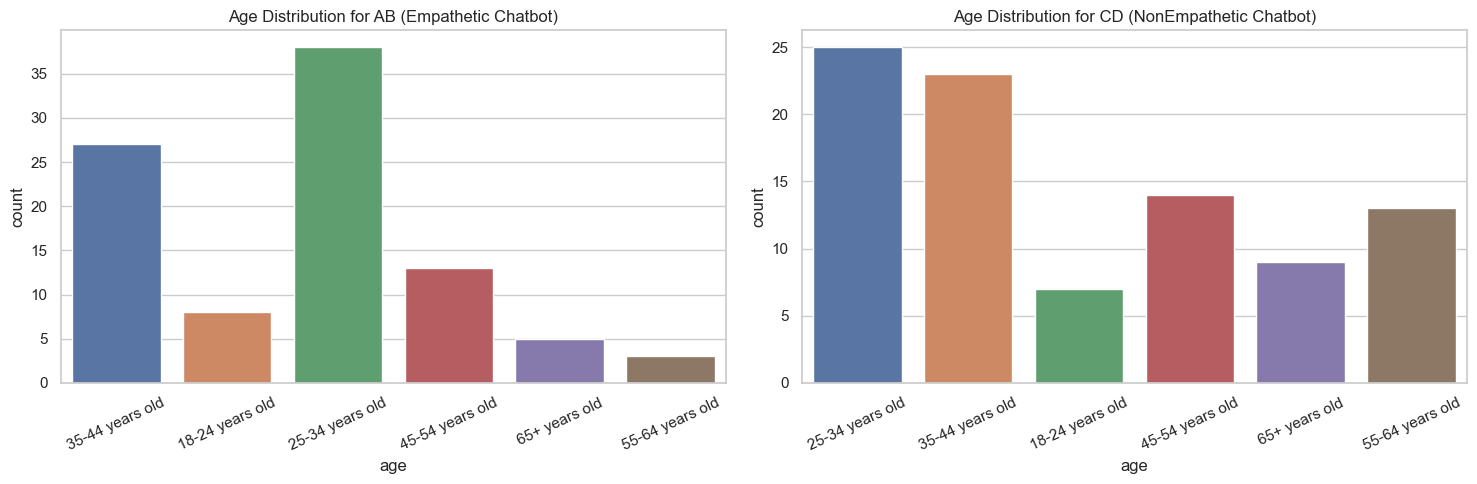

In [21]:
## AB vs CD Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# AB (empathetic chatbot)
abcs = demo[demo['group'].isin(['A', 'B'])]
sns.countplot(x='age', data=abcs, ax=axes[0])
axes[0].set(title='Age Distribution for AB (Empathetic Chatbot)')
axes[0].tick_params(axis='x', rotation=25)

# CD (non-empathetic chatbot)
efs = demo[demo['group'].isin(['C', 'D'])]
sns.countplot(x='age', data=efs, ax=axes[1])
axes[1].set(title='Age Distribution for CD (NonEmpathetic Chatbot)')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

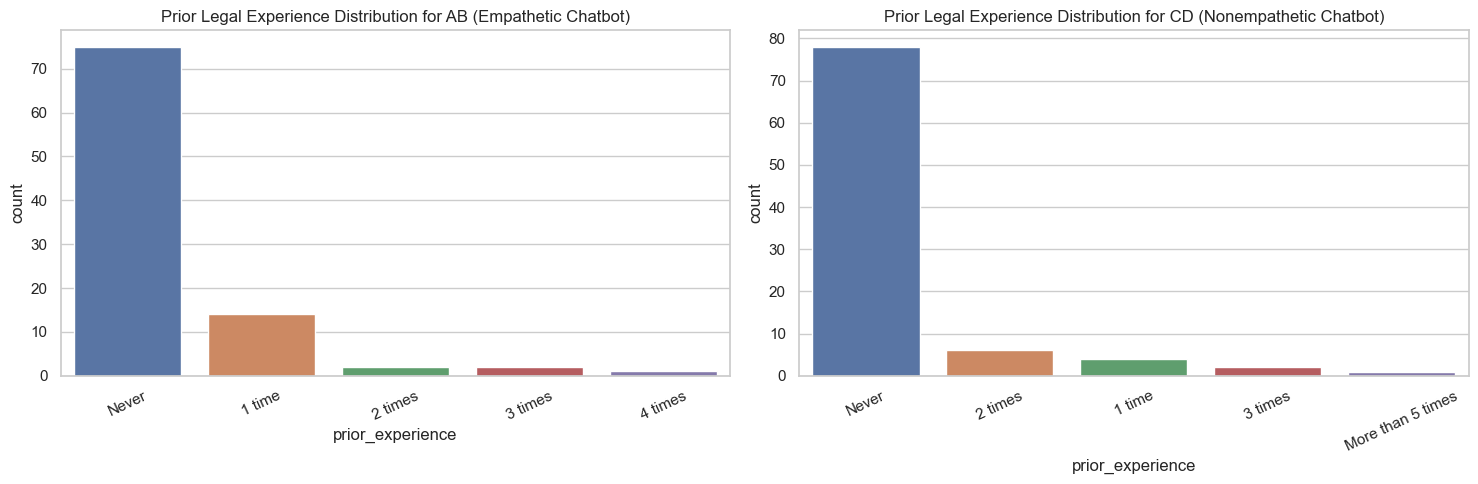

In [22]:
## AB vs CD Prior Legal Experience Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# AB (empathetic chatbot)
abcs = demo[demo['group'].isin(['A', 'B'])]
sns.countplot(x='prior_experience', data=abcs, ax=axes[0])
axes[0].set(title='Prior Legal Experience Distribution for AB (Empathetic Chatbot)')
axes[0].tick_params(axis='x', rotation=25)

# CD (non-empathetic chatbot)
efs = demo[demo['group'].isin(['C', 'D'])]
sns.countplot(x='prior_experience', data=efs, ax=axes[1])
axes[1].set(title='Prior Legal Experience Distribution for CD (Nonempathetic Chatbot)')
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()

In [5]:
def perform_chi_square(group1, group2, variable, group1_name, group2_name):
    # Create a contingency table
    contingency_table = pd.crosstab(pd.concat([group1, group2])[variable], 
                                    pd.concat([group1, group2]).index.isin(group1.index))
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {variable} between {group1_name} and {group2_name}:")
    print(f"chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("\nContingency Table:")
    print(contingency_table)
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
    print("\n")


In [6]:
# Add Chi-square for A vs ABCD, B vs ABCD, C vs ABCD, and D vs ABCD
abcd = demo[demo['group'].isin(['A', 'B', 'C', 'D'])]

for group in ['A', 'B', 'C', 'D']:
    group_data = demo[demo['group'] == group]
    perform_chi_square(group_data, abcd, 'age', f'Group {group}', 'ABCD')
    perform_chi_square(group_data, abcd, 'prior_experience', f'Group {group}', 'ABCD')
    print("\n")


Chi-square test for age between Group A and ABCD:
chi-square statistic: 7.9500
p-value: 0.1590

Contingency Table:
col_0            False  True 
age                          
18-24 years old     10     10
25-34 years old     47     32
35-44 years old     34     32
45-54 years old     21     12
55-64 years old     13      6
65+ years old       13      2

Expected Frequencies:
col_0                False      True 
age                                  
18-24 years old  11.896552   8.103448
25-34 years old  46.991379  32.008621
35-44 years old  39.258621  26.741379
45-54 years old  19.629310  13.370690
55-64 years old  11.301724   7.698276
65+ years old     8.922414   6.077586


Chi-square test for prior_experience between Group A and ABCD:
chi-square statistic: 12.6181
p-value: 0.0272

Contingency Table:
col_0              False  True 
prior_experience               
1 time                 9     18
2 times                6      4
3 times                3      2
4 times                0   

In [6]:
# Chi-square tests for Chatbot vs FAQ
chatbot = demo[demo['group'].isin(['A', 'B', 'C', 'D'])]
faq = demo[demo['group'].isin(['E', 'F'])]

perform_chi_square(chatbot, faq, 'age', 'Chatbot', 'FAQ')
perform_chi_square(chatbot, faq, 'prior_experience', 'Chatbot', 'FAQ')


Chi-square test for age between Chatbot and FAQ:
chi-square statistic: 0.4113
p-value: 0.9950

Contingency Table:
col_0            False  True 
age                          
18-24 years old      9     15
25-34 years old     31     63
35-44 years old     24     50
45-54 years old     13     27
55-64 years old      9     16
65+ years old        6     14

Expected Frequencies:
col_0                False      True 
age                                  
18-24 years old   7.971119  16.028881
25-34 years old  31.220217  62.779783
35-44 years old  24.577617  49.422383
45-54 years old  13.285199  26.714801
55-64 years old   8.303249  16.696751
65+ years old     6.642599  13.357401


Chi-square test for prior_experience between Chatbot and FAQ:
chi-square statistic: 3.5821
p-value: 0.6110

Contingency Table:
col_0              False  True 
prior_experience               
1 time                 7     18
2 times                1      8
3 times                2      4
4 times                0      

In [7]:
# Chi-square tests for Empathetic vs Non-empathetic Chatbot
empathetic = demo[demo['group'].isin(['A', 'B'])]
non_empathetic = demo[demo['group'].isin(['C', 'D'])]

perform_chi_square(empathetic, non_empathetic, 'age', 'Empathetic Chatbot', 'Non-empathetic Chatbot')
perform_chi_square(empathetic, non_empathetic, 'prior_experience', 'Empathetic Chatbot', 'Non-empathetic Chatbot')

Chi-square test for age between Empathetic Chatbot and Non-empathetic Chatbot:
chi-square statistic: 10.4532
p-value: 0.0634

Contingency Table:
col_0            False  True 
age                          
18-24 years old      7      8
25-34 years old     25     38
35-44 years old     23     27
45-54 years old     14     13
55-64 years old     13      3
65+ years old        9      5

Expected Frequencies:
col_0                False      True 
age                                  
18-24 years old   7.378378   7.621622
25-34 years old  30.989189  32.010811
35-44 years old  24.594595  25.405405
45-54 years old  13.281081  13.718919
55-64 years old   7.870270   8.129730
65+ years old     6.886486   7.113514


Chi-square test for prior_experience between Empathetic Chatbot and Non-empathetic Chatbot:
chi-square statistic: 9.5682
p-value: 0.0884

Contingency Table:
col_0              False  True 
prior_experience               
1 time                 4     14
2 times                6      2
3

In [8]:
# Chi-square tests for Anger vs No Anger
anger = demo[demo['group'].isin(['B', 'D', 'F'])]
no_anger = demo[demo['group'].isin(['A', 'C', 'E'])]

perform_chi_square(anger, no_anger, 'age', 'Anger', 'No Anger')
perform_chi_square(anger, no_anger, 'prior_experience', 'Anger', 'No Anger')

Chi-square test for age between Anger and No Anger:
chi-square statistic: 3.3601
p-value: 0.6446

Contingency Table:
col_0            False  True 
age                          
18-24 years old     13     11
25-34 years old     44     50
35-44 years old     38     36
45-54 years old     20     20
55-64 years old     16      9
65+ years old        8     12

Expected Frequencies:
col_0                False      True 
age                                  
18-24 years old  12.043321  11.956679
25-34 years old  47.169675  46.830325
35-44 years old  37.133574  36.866426
45-54 years old  20.072202  19.927798
55-64 years old  12.545126  12.454874
65+ years old    10.036101   9.963899


Chi-square test for prior_experience between Anger and No Anger:
chi-square statistic: 3.4628
p-value: 0.6290

Contingency Table:
col_0              False  True 
prior_experience               
1 time                14     11
2 times                6      3
3 times                3      3
4 times                1

In [13]:
def perform_chi_square(data, variable, group_var):
    # Create a contingency table
    contingency_table = pd.crosstab(data[variable], data[group_var])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {variable} across all groups:")
    print(f"chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"degrees of freedom: {dof}")
    print("\nContingency Table:")
    print(contingency_table)
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
    print("\n")

    # Post-hoc analysis: standardized residuals
    observed = contingency_table.values
    residuals = (observed - expected) / np.sqrt(expected)
    print("Standardized Residuals:")
    print(pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns))
    print("\n")

In [14]:
# Perform chi-square tests for age and prior_experience across all groups
perform_chi_square(demo, 'age', 'group')
perform_chi_square(demo, 'prior_experience', 'group')

Chi-square test for age across all groups:
chi-square statistic: 18.1623
p-value: 0.8354
degrees of freedom: 25

Contingency Table:
group             A   B   C   D   E   F
age                                    
18-24 years old   5   3   4   3   4   5
25-34 years old  16  22  12  13  16  15
35-44 years old  16  11  12  11  10  14
45-54 years old   6   7   7   7   7   6
55-64 years old   3   0   7   6   6   3
65+ years old     1   4   4   5   3   3

Expected Frequencies:
group                    A          B          C          D          E  \
age                                                                      
18-24 years old   4.072202   4.072202   3.985560   3.898917   3.985560   
25-34 years old  15.949458  15.949458  15.610108  15.270758  15.610108   
35-44 years old  12.555957  12.555957  12.288809  12.021661  12.288809   
45-54 years old   6.787004   6.787004   6.642599   6.498195   6.642599   
55-64 years old   4.241877   4.241877   4.151625   4.061372   4.151625   
65+ yea

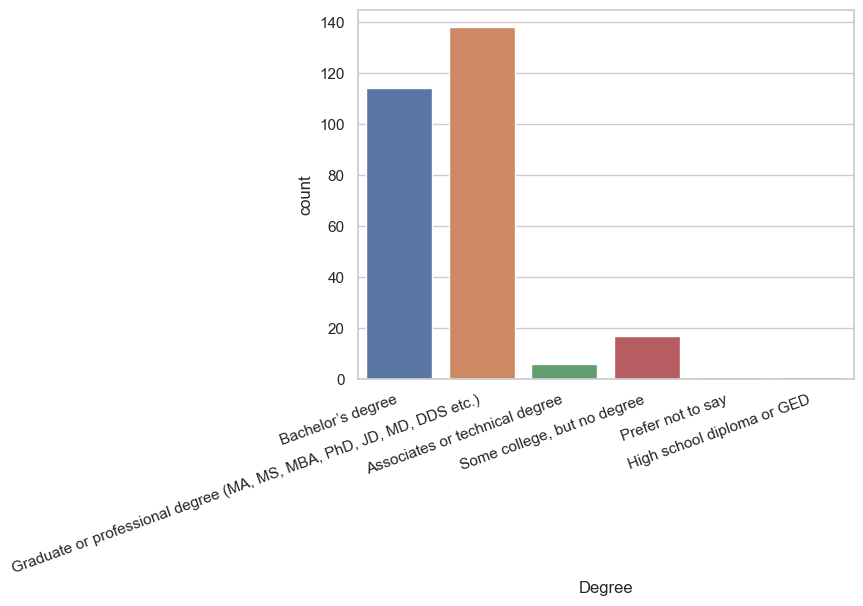

In [8]:
## Degree
ax = sns.countplot(x='Degree',data=ddmo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

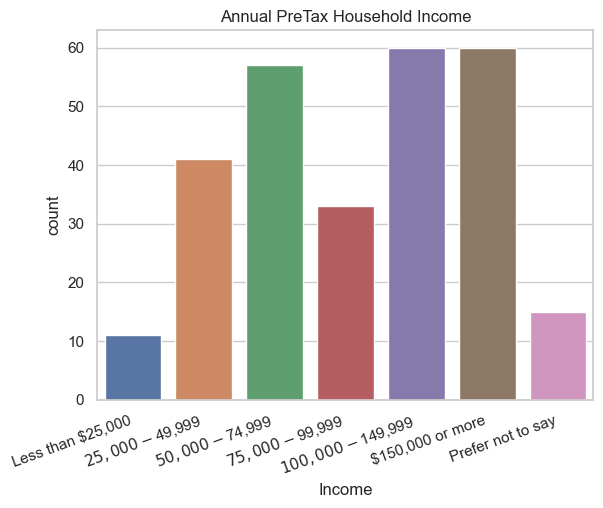

In [9]:
## Income
ax = sns.countplot(x='Income',data=ddmo,order=['Less than $25,000','$25,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000 or more','Prefer not to say'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set(title="Annual PreTax Household Income")
plt.show()

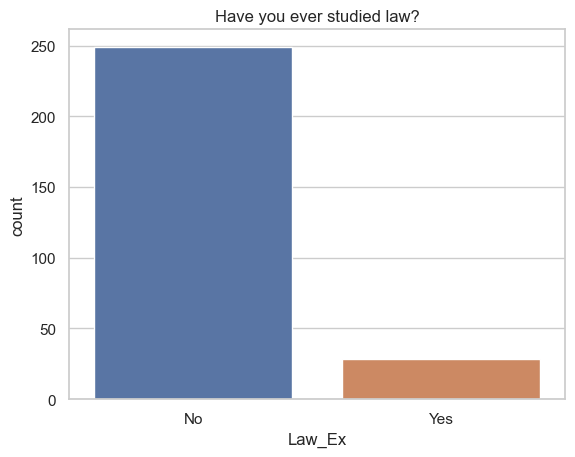

In [10]:
## Law Experience - add number
ax = sns.countplot(x='Law_Ex',data=ddmo)
ax.set(title="Have you ever studied law?")
plt.show()

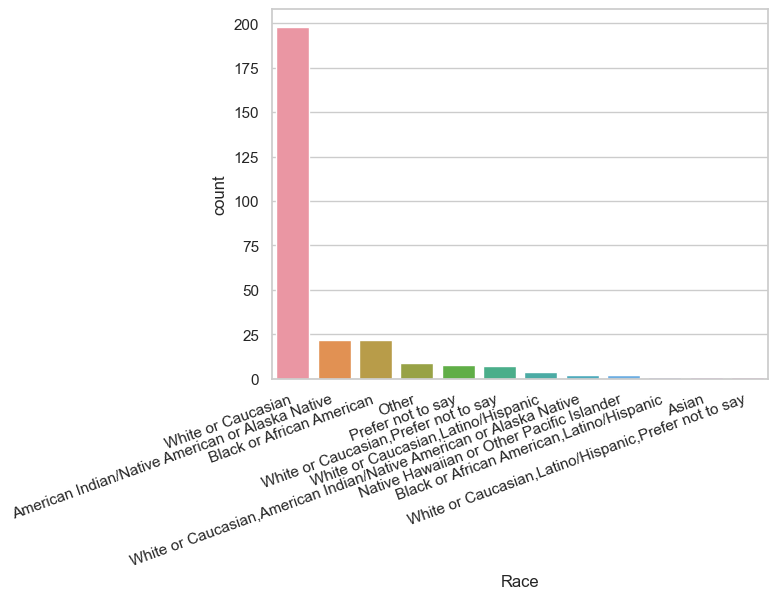

In [11]:
## Race - percent
ax = sns.countplot(x='Race',data=ddmo,order=ddmo['Race'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

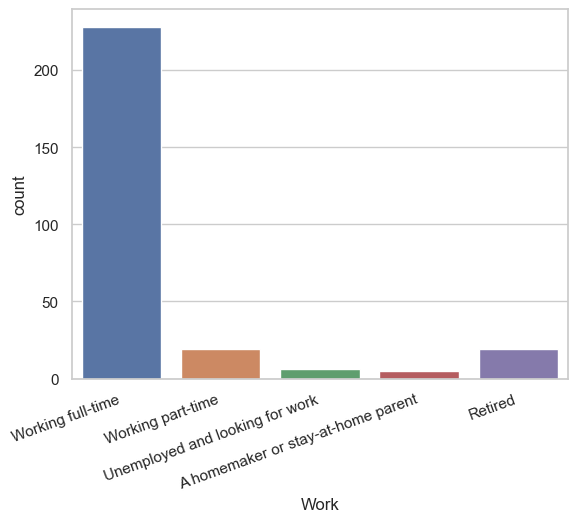

In [12]:
## Work
ax = sns.countplot(x='Work',data=ddmo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [13]:
# Comprehension Questions
comp = pd.read_csv("data/comprehensions.csv")
group = pd.read_csv("data/group.csv")
ngroup = group.to_numpy().squeeze()

In [14]:
l = loader()
deps = l.load_depend()

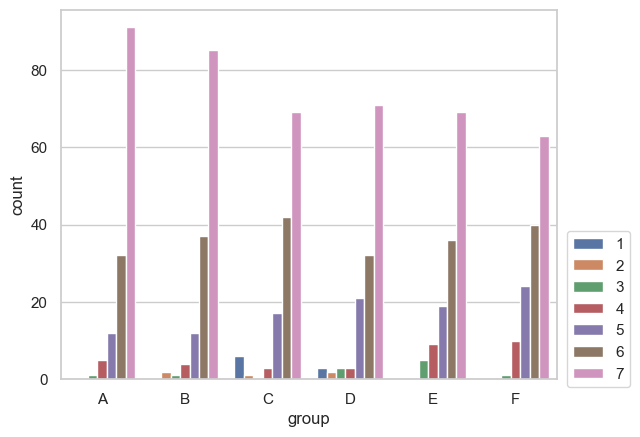

In [15]:
l_groups = ['A','B','C','D','E','F']
h = deps.get('helpfulness')
helpfulness = pd.concat([h, group],axis=1)
mt = pd.melt(helpfulness, id_vars=['group'],value_vars=['helpfulness','usefulness','informative'], var_name='helpfulness',value_name='scale')
ax = sns.countplot(x='group',hue='scale',data=mt,order=l_groups)
plt.legend(bbox_to_anchor=(1.02, 0.40), loc='upper left', borderaxespad=0)
plt.show()

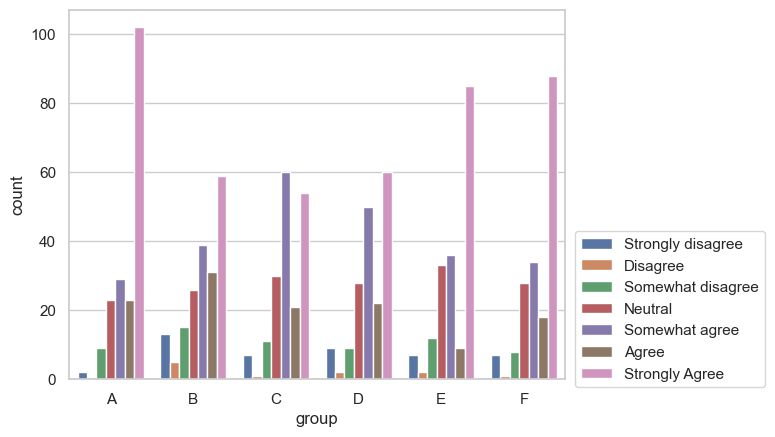

In [16]:
l_groups = ['A','B','C','D','E','F']
c = deps.get('credibility')
credibility = pd.concat([c, group],axis=1)
mt = pd.melt(credibility, id_vars=['group'],value_vars=['Trustworthy','Honesty','Ability','OverallTrust'], var_name='credibility',value_name='scale')
ax = sns.countplot(x='group',hue='scale',data=mt,order=l_groups)
plt.legend(['Strongly disagree', 'Disagree','Somewhat disagree','Neutral','Somewhat agree','Agree','Strongly Agree'],bbox_to_anchor=(1.02, 0.40), loc='upper left', borderaxespad=0)
plt.show()

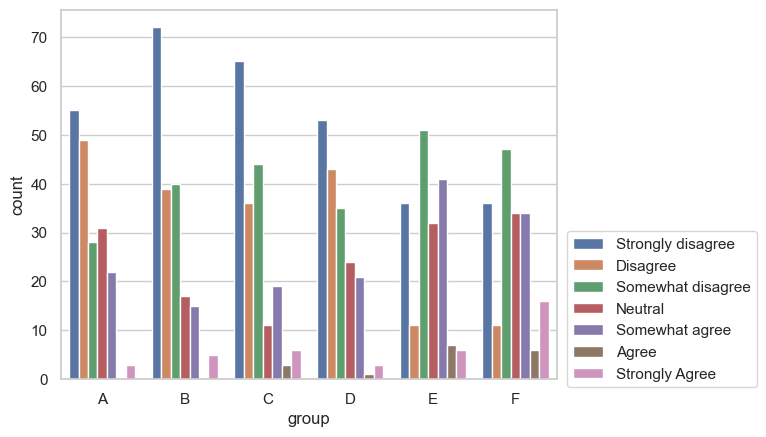

In [17]:
l_groups = ['A','B','C','D','E','F']
e = deps.get('cognitive_effort')
effort = pd.concat([e, group],axis=1)
mt = pd.melt(effort, id_vars=['group'],value_vars=['Thinking','Contemplated','Demanding','Effort'], var_name='cognitive_effort',value_name='scale')
ax = sns.countplot(x='group',hue='scale',data=mt,order=l_groups)
plt.legend(['Strongly disagree', 'Disagree','Somewhat disagree','Neutral','Somewhat agree','Agree','Strongly Agree'],bbox_to_anchor=(1.02, 0.40), loc='upper left', borderaxespad=0)
plt.show()

In [18]:
# Comprehension Questions

comprehens = pd.read_csv('data/comprehensions.csv')

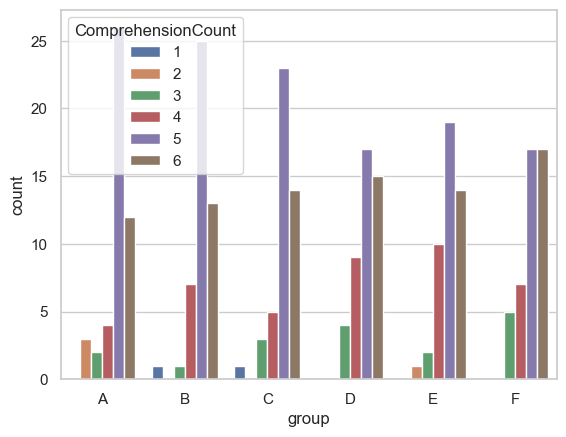

In [19]:
l_groups = ['A','B','C','D','E','F']
comp = pd.concat([comprehens, group],axis=1)
ax = sns.countplot(x='group',hue='ComprehensionCount',data=comp,order=l_groups)
plt.show()

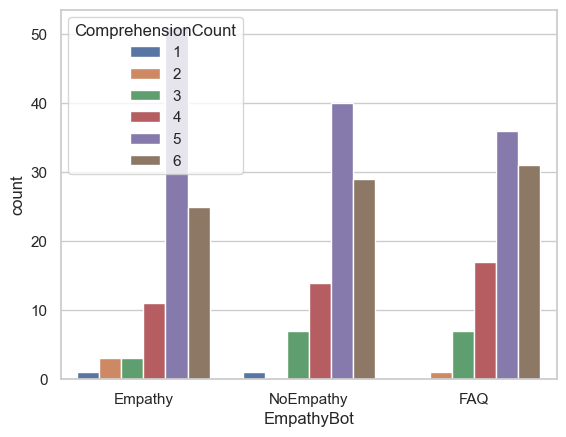

In [20]:
l_groups = ['Empathy','NoEmpathy','FAQ']
comp['EmpathyBot'] = comp['group'].copy()
comp['EmpathyBot'] = comp['EmpathyBot'].map({'A':'Empathy', 'B':'Empathy', 'C': 'NoEmpathy', 'D': 'NoEmpathy', 'E': 'FAQ', 'F': 'FAQ'})
ax = sns.countplot(x='EmpathyBot',hue='ComprehensionCount',data=comp,order=l_groups)
plt.show()

array([[<Axes: title={'center': 'Empathy'}>,
        <Axes: title={'center': 'FAQ'}>],
       [<Axes: title={'center': 'NoEmpathy'}>, <Axes: >]], dtype=object)

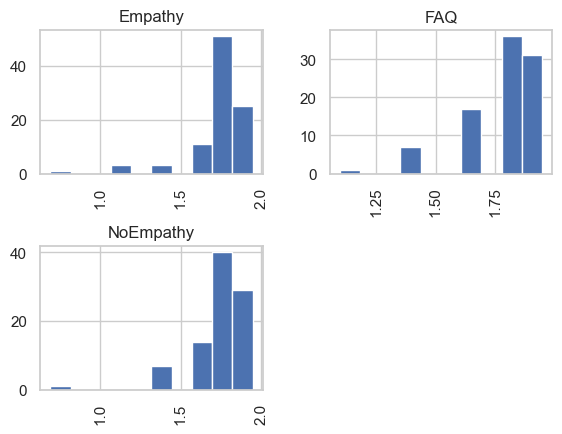

In [21]:
comp['countAfterLog'] = np.log(comp.ComprehensionCount+1)
comp['countAfterLog'].hist(by=comp['EmpathyBot'])

array([[<Axes: title={'center': 'Empathy'}>,
        <Axes: title={'center': 'FAQ'}>],
       [<Axes: title={'center': 'NoEmpathy'}>, <Axes: >]], dtype=object)

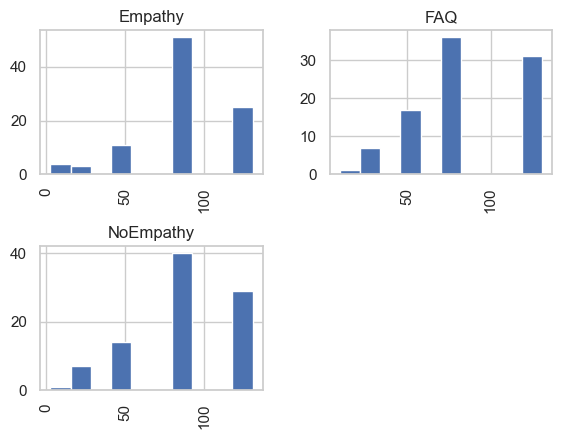

In [22]:
comp['countAfterBoxCox'], __ = stats.boxcox(comp.ComprehensionCount+1)
comp['countAfterBoxCox'].hist(by=comp['EmpathyBot'])

In [23]:
def plot_diff_in_means(data: pd.DataFrame, col1: str, col2: str):
    """
    Given data, plots difference in means with confidence intervals across groups
    col1: categorical data with groups
    col2: continuous data for the means
    """
    n = data.groupby(col1)[col2].count()
    # n contains a pd.Series with sample size for each category

    cat = list(data.groupby(col1, as_index=False)[col2].count()[col1])
    # 'cat' has the names of the categories, like 'category 1', 'category 2'

    mean = data.groupby(col1)[col2].agg('mean')
    # The average value of col2 across the categories

    std = data.groupby(col1)[col2].agg(np.std)
    se = std / np.sqrt(n)
    # Standard deviation and standard error

    lower = stats.t.interval(confidence = 0.95, df=n-1, loc = mean, scale = se)[0]
    upper = stats.t.interval(confidence = 0.95, df =n-1, loc = mean, scale = se)[1]
    # Calculates the upper and lower bounds using SciPy

    for upper, mean, lower, y in zip(upper, mean, lower, cat):
        plt.plot((lower, mean, upper), (y, y, y), 'b.-')
        # for 'b.-': 'b' means 'blue', '.' means dot, '-' means solid line
    plt.yticks(
        range(len(n)),
        list(data.groupby(col1, as_index = False)[col2].count()[col1])
        )

In [24]:
# Cross Tab of Empathy Chatbot Group and count of correct comprehension questions
pd.crosstab(comp['EmpathyBot'], comp['ComprehensionCount'])

ComprehensionCount,1,2,3,4,5,6
EmpathyBot,,,,,,
Empathy,1,3,3,11,51,25
FAQ,0,1,7,17,36,31
NoEmpathy,1,0,7,14,40,29


In [25]:
result = []
compq = ['Q1_2', 'Q1_3', 'Q1_4', 'Q2_1', 'Q2_2', 'Q2_3']
for q in compq:
    for q_b in compq:
        # Chi-square test of independence of variables in a contingency table.
        result.append((q, q_b, list(stats.chi2_contingency(pd.crosstab(comp[q], comp[q_b])))[1]))

In [26]:
corr_output = pd.DataFrame(result, columns = ['var1', 'var2', 'corr'])
corr_output.pivot(index = 'var1', columns = 'var2', values = 'corr')

var2,Q1_2,Q1_3,Q1_4,Q2_1,Q2_2,Q2_3
var1,,,,,,
Q1_2,1.410722e-60,8.331559e-01,1.246103e-01,6.315835e-01,9.828589e-02,1.030056e-02
Q1_3,8.331559e-01,2.953874e-61,4.810933e-01,2.602343e-01,8.731748e-01,5.262040e-02
Q1_4,1.246103e-01,4.810933e-01,3.346641e-61,2.125952e-02,7.216008e-01,1.146909e-01
Q2_1,6.315835e-01,2.602343e-01,2.125952e-02,4.719767e-57,5.152168e-03,9.144426e-02
Q2_2,9.828589e-02,8.731748e-01,7.216008e-01,5.152168e-03,3.875087e-60,7.589186e-01
Q2_3,1.030056e-02,5.262040e-02,1.146909e-01,9.144426e-02,7.589186e-01,4.272973e-56


In [27]:
# View the p-values for the correlation between the comprehension questions of less than 0.05
corr_output['corr_b'] = corr_output['corr'].apply(lambda x: x<0.05)
corr_output.pivot(index = 'var1', columns = 'var2', values = 'corr_b')

var2,Q1_2,Q1_3,Q1_4,Q2_1,Q2_2,Q2_3
var1,,,,,,
Q1_2,True,False,False,False,False,True
Q1_3,False,True,False,False,False,False
Q1_4,False,False,True,True,False,False
Q2_1,False,False,True,True,True,False
Q2_2,False,False,False,True,True,False
Q2_3,True,False,False,False,False,True


To Generalize: 1.2 and 2.3, 1.4 and 2.1, 2.1 and 2.2 are correlated. - Bad Grouping!!

In [28]:
# Suggested 

In [29]:
comp[['ComprehensionCount','EmpathyBot']].groupby(['EmpathyBot']).mean()

,ComprehensionCount
EmpathyBot,
Empathy,4.946809
FAQ,4.967391
NoEmpathy,4.967033


In [30]:
comp[['ComprehensionCount','EmpathyBot']].groupby(['EmpathyBot']).std()

,ComprehensionCount
EmpathyBot,
Empathy,0.987742
FAQ,0.965915
NoEmpathy,0.982633


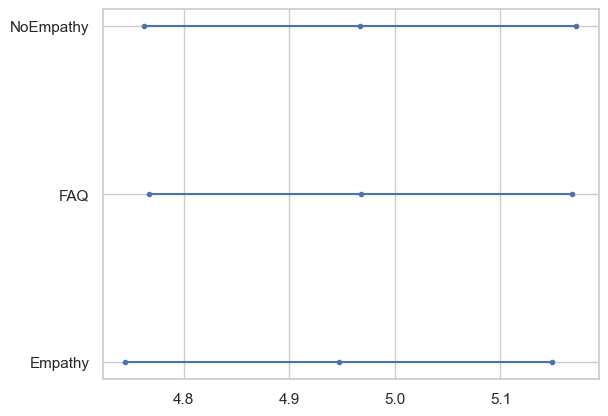

In [31]:
plot_diff_in_means(data=comp, col1='EmpathyBot', col2 = 'ComprehensionCount')

In [32]:
comp[['countAfterLog','EmpathyBot']].groupby(['EmpathyBot']).mean()

,countAfterLog
EmpathyBot,
Empathy,1.764672
FAQ,1.771627
NoEmpathy,1.769573


In [33]:
comp[['countAfterLog','EmpathyBot']].groupby(['EmpathyBot']).std()

,countAfterLog
EmpathyBot,
Empathy,0.208225
FAQ,0.178384
NoEmpathy,0.196284


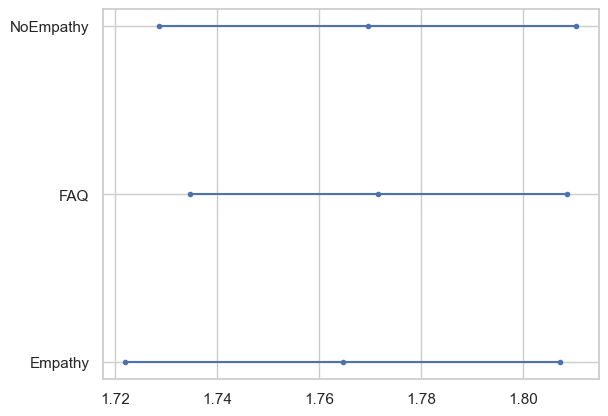

In [34]:
plot_diff_in_means(data=comp, col1='EmpathyBot', col2 = 'countAfterLog')

In [35]:
comp[['countAfterBoxCox','EmpathyBot']].groupby(['EmpathyBot']).mean()

,countAfterBoxCox
EmpathyBot,
Empathy,85.372447
FAQ,86.302625
NoEmpathy,86.347821


In [36]:
comp[['countAfterBoxCox','EmpathyBot']].groupby(['EmpathyBot']).std()

,countAfterBoxCox
EmpathyBot,
Empathy,33.698055
FAQ,36.921589
NoEmpathy,35.968583


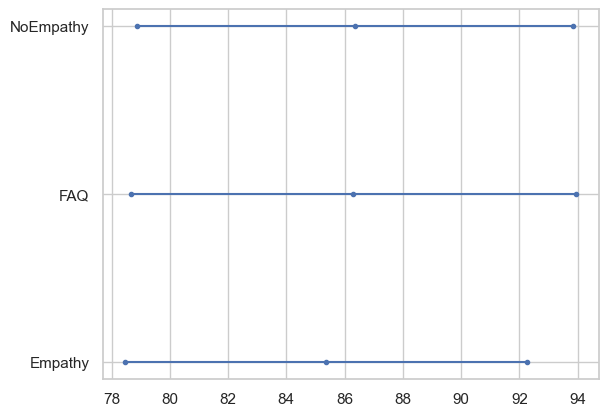

In [37]:
plot_diff_in_means(data=comp, col1='EmpathyBot', col2 = 'countAfterBoxCox')

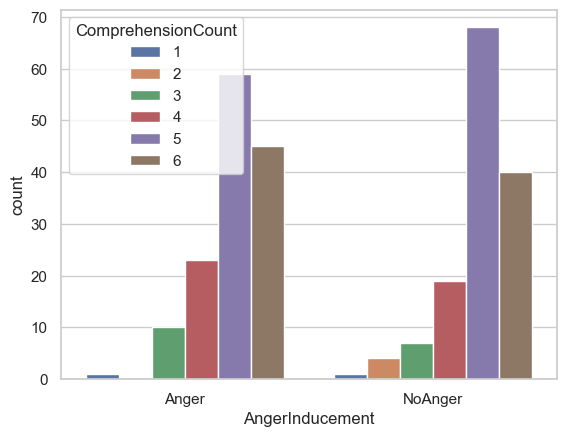

In [38]:
l_groups = ['Anger','NoAnger']
comp['AngerInducement'] = comp['group'].copy()
comp['AngerInducement'] = comp['AngerInducement'].map({'A':'NoAnger', 'C':'NoAnger', 'E':'NoAnger', 'B':'Anger', 'D':'Anger', 'F':'Anger'})
ax = sns.countplot(x='AngerInducement',hue='ComprehensionCount',data=comp,order=l_groups)
plt.show()

In [39]:
pd.crosstab(comp['AngerInducement'], comp['ComprehensionCount'])

ComprehensionCount,1,2,3,4,5,6
AngerInducement,,,,,,
Anger,1,0,10,23,59,45
NoAnger,1,4,7,19,68,40


In [40]:
comp[['ComprehensionCount','AngerInducement']].groupby(['AngerInducement']).mean()

,ComprehensionCount
AngerInducement,
Anger,4.985507
NoAnger,4.935252


In [41]:
## Depedent Variables
df = pd.read_csv('data/all_weights.csv')

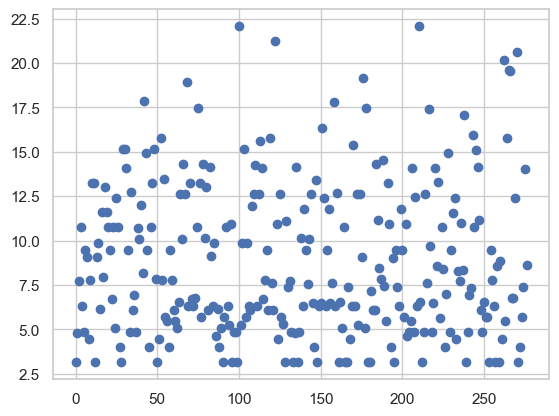

In [42]:
plt.scatter(df.index, df['Effort'])

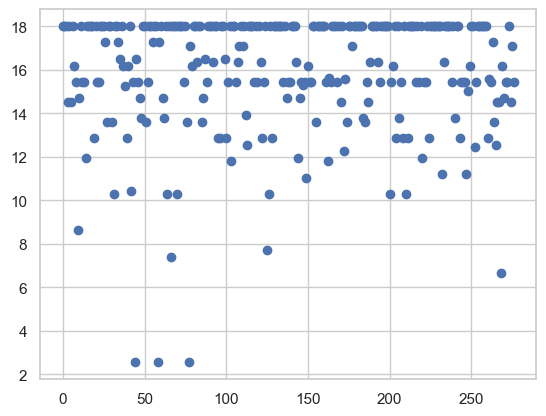

In [43]:
plt.scatter(df.index, df['Helpfulness'])

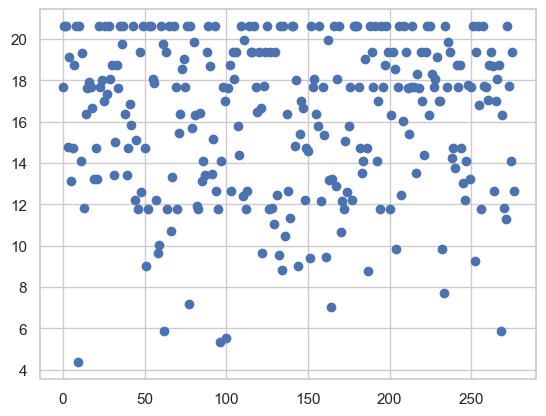

In [44]:
plt.scatter(df.index, df['Trustworthy'])

In [45]:
from statsmodels.stats.power import TTestIndPower

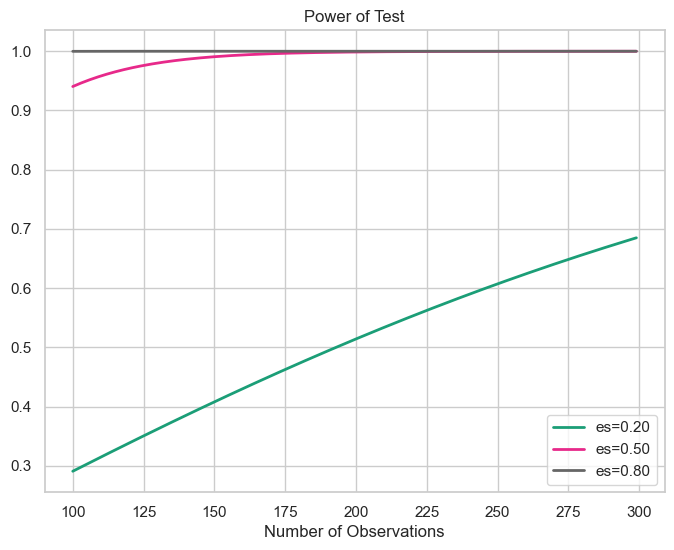

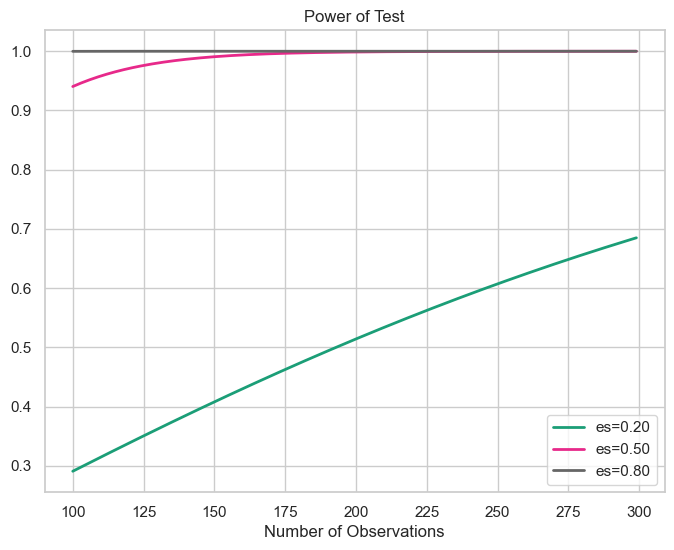

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
pow_ana = TTestIndPower()
pow_ana.plot_power(dep_var='nobs', nobs=np.arange(100, 300), effect_size=np.array([0.2, 0.5, 0.8]), alpha=0.05, ax=ax)